In [9]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.preprocessing import PolynomialFeatures


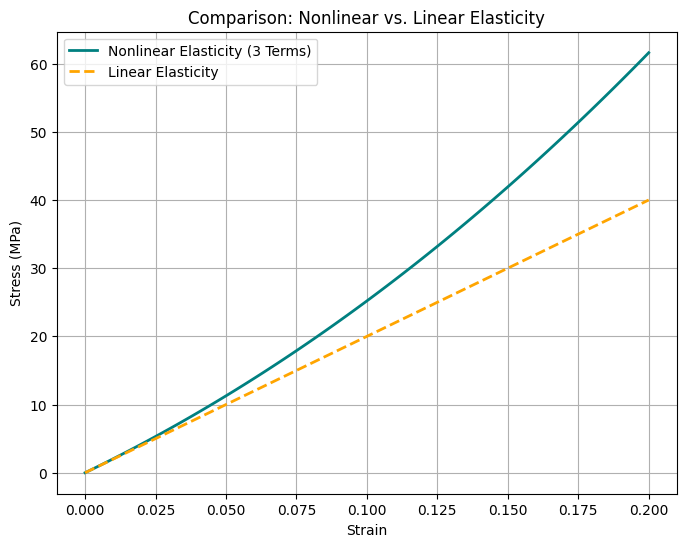

In [10]:
import numpy as np
import matplotlib.pyplot as plt

# Define the constants for the nonlinear model with three terms
E_nonlinear = 200  # Elastic modulus (MPa)
C1_nonlinear = 500  # Second-order nonlinear term (MPa)
C2_nonlinear = 200  # Third-order nonlinear term (MPa)

# Define the strain range for the elastic material
strain_values = np.linspace(0, 0.2, 100)  # Strain from 0 to 0.2

# Define the extended nonlinear stress-strain relationship with three terms
def stress_nonlinear(strain):
    return E_nonlinear * strain + C1_nonlinear * strain**2 + C2_nonlinear * strain**3

# Define the linear elastic stress-strain relationship
def stress_linear(strain):
    return E_nonlinear * strain  # Using the same elastic modulus for comparison

# Generate stress data for both models
stress_data_nonlinear = stress_nonlinear(strain_values)
stress_data_linear = stress_linear(strain_values)

# Plotting both the nonlinear (3 terms) and linear elastic stress-strain curves
plt.figure(figsize=(8, 6))
plt.plot(strain_values, stress_data_nonlinear, label='Nonlinear Elasticity (3 Terms)', linewidth=2, color='teal')
plt.plot(strain_values, stress_data_linear, label='Linear Elasticity', linestyle='--', linewidth=2, color='orange')
plt.xlabel('Strain')
plt.ylabel('Stress (MPa)')
plt.title('Comparison: Nonlinear vs. Linear Elasticity')
plt.legend()
plt.grid(True)
plt.show()


In [11]:
import pickle
import numpy as np
from matplotlib import pyplot as plt
from ICNN import ICNN

Epoch [500/5000] || Train Loss: 0.083079964 || Val Loss: 0.091148980 || LR: 1e-02
Epoch [1000/5000] || Train Loss: 0.083077602 || Val Loss: 0.091144800 || LR: 1e-02
Epoch [1500/5000] || Train Loss: 0.083077408 || Val Loss: 0.091144025 || LR: 1e-02
Epoch [2000/5000] || Train Loss: 0.083077393 || Val Loss: 0.091143645 || LR: 8e-03
Epoch [2500/5000] || Train Loss: 0.083077393 || Val Loss: 0.091143407 || LR: 8e-03
Epoch [3000/5000] || Train Loss: 0.083077393 || Val Loss: 0.091143273 || LR: 8e-03
Epoch [3500/5000] || Train Loss: 0.083077431 || Val Loss: 0.091140360 || LR: 8e-03
Epoch [4000/5000] || Train Loss: 0.083077393 || Val Loss: 0.091143109 || LR: 8e-03
Epoch [4500/5000] || Train Loss: 0.083077393 || Val Loss: 0.091141962 || LR: 8e-03
Epoch [5000/5000] || Train Loss: 0.083077401 || Val Loss: 0.091143072 || LR: 6e-03
Epoch [500/5000] || Train Loss: 0.000001574 || Val Loss: 0.000004376 || LR: 1e-02
Epoch [1000/5000] || Train Loss: 0.000000453 || Val Loss: 0.000001735 || LR: 1e-02
Epoch 

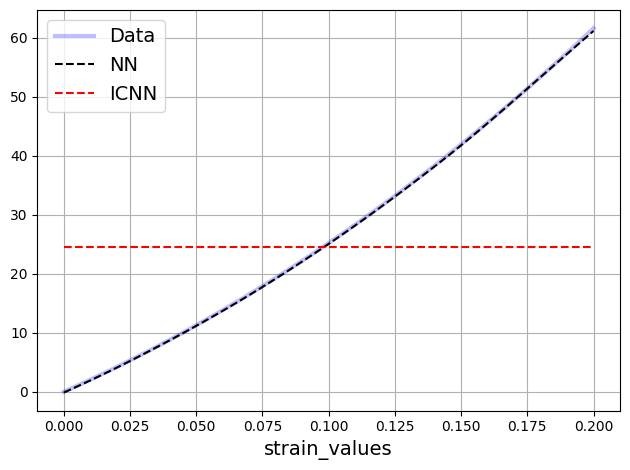

In [12]:

number_of_epochs = 5000
lr = 0.01

icnn = ICNN([1, 64, 64, 64,64, 1], activation_function="elu")
nn = ICNN([1, 64, 64, 64,64, 1], activation_function="elu")

icnn.convex_training(strain_values, stress_data_nonlinear, learning_rate=lr, epochs=number_of_epochs, epsilon=30, do_convex_training=True)
nn.convex_training(strain_values, stress_data_nonlinear, learning_rate=lr, epochs=number_of_epochs, epsilon=30, do_convex_training=False)

# # Plot ICNN model

plt.plot(strain_values, stress_data_nonlinear, label=f'Data', linewidth=3, alpha=0.25, color='blue')
plt.plot(strain_values, nn(strain_values), '--', color='black', label='NN', linewidth=1.5)
plt.plot(strain_values, icnn(strain_values), '--', color='red',label='ICNN', linewidth=1.5)
plt.xlabel('strain_values', fontsize=14)
plt.legend(fontsize=14)
plt.tight_layout()
plt.grid()
plt.show()